In [11]:

pip install wordcloud plotly seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
#EDA 
#Import Libraries
import pandas as pd #reading
import numpy as np #transformation
import matplotlib.pyplot as plt #visual
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [9]:
#Apply a purple themed Seaborn style
sns.set_style("whitegrid")
sns.set_palette("Purples")
sns.set_context("notebook", font_scale=1.2)

In [11]:
data = pd.read_csv('Viral_Social_Media_Trends.csv')

In [13]:
data.head(10)

Post_ID   Platform     Hashtag Content_Type     Region    Views   Likes  \
0   Post_1     TikTok  #Challenge        Video         UK  4163464  339431   
1   Post_2  Instagram  #Education       Shorts      India  4155940  215240   
2   Post_3    Twitter  #Challenge        Video     Brazil  3666211  327143   
3   Post_4    YouTube  #Education       Shorts  Australia   917951  127125   
4   Post_5     TikTok      #Dance         Post     Brazil    64866  171361   
5   Post_6  Instagram  #Challenge       Shorts  Australia  1323566  136282   
6   Post_7    YouTube     #Comedy        Tweet      Japan   627233   84121   
7   Post_8    YouTube     #Gaming       Shorts         UK  2066886  317502   
8   Post_9    Twitter  #Education  Live Stream      India  2169523  496078   
9  Post_10     TikTok     #Gaming       Shorts      India  3898384    8634   

   Shares  Comments Engagement_Level  
0   53135     19346             High  
1   65860     27239           Medium  
2   39423     36223           Medium  
3   11687     36806              Low  
4   69581      6376           Medium  
5   86979     47129              Low  
6   97973     32648           Medium  
7   45222     33638             High  
8   96041     30174           Medium  
9   69378     42700              Low

In [15]:
#Basic Information (Rows, Columns)
data.shape

(5000, 10)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


In [19]:
# Check for missing values
data.isnull().sum()

Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
dtype: int64

In [21]:
data.describe()

Views          Likes        Shares      Comments
count  5.000000e+03    5000.000000   5000.000000   5000.000000
mean   2.494066e+06  251475.029800  50519.562000  24888.393800
std    1.459490e+06  144349.583384  29066.362671  14284.504319
min    1.266000e+03     490.000000     52.000000     18.000000
25%    1.186207e+06  126892.250000  25029.000000  12305.250000
50%    2.497373e+06  249443.000000  50839.500000  25004.000000
75%    3.759781e+06  373970.750000  75774.250000  37072.750000
max    4.999430e+06  499922.000000  99978.000000  49993.000000

In [23]:
data.describe(include = 'all')

Post_ID Platform   Hashtag Content_Type Region         Views  \
count     5000     5000      5000         5000   5000  5.000000e+03   
unique    5000        4        10            6      8           NaN   
top     Post_1  YouTube  #Fitness  Live Stream    USA           NaN   
freq         1     1324       536          855    677           NaN   
mean       NaN      NaN       NaN          NaN    NaN  2.494066e+06   
std        NaN      NaN       NaN          NaN    NaN  1.459490e+06   
min        NaN      NaN       NaN          NaN    NaN  1.266000e+03   
25%        NaN      NaN       NaN          NaN    NaN  1.186207e+06   
50%        NaN      NaN       NaN          NaN    NaN  2.497373e+06   
75%        NaN      NaN       NaN          NaN    NaN  3.759781e+06   
max        NaN      NaN       NaN          NaN    NaN  4.999430e+06   

                Likes        Shares      Comments Engagement_Level  
count     5000.000000   5000.000000   5000.000000             5000  
unique            NaN           NaN           NaN                3  
top               NaN           NaN           NaN              Low  
freq              NaN           NaN           NaN             1729  
mean    251475.029800  50519.562000  24888.393800              NaN  
std     144349.583384  29066.362671  14284.504319              NaN  
min        490.000000     52.000000     18.000000              NaN  
25%     126892.250000  25029.000000  12305.250000              NaN  
50%     249443.000000  50839.500000  25004.000000              NaN  
75%     373970.750000  75774.250000  37072.750000              NaN  
max     499922.000000  99978.000000  49993.000000              NaN

In [25]:
num = ['Views', 'Likes', 'Shares', 'Comments'] 
# To check the descriptive statistic summary 
ds =({'Mean': data[num].mean(),
      'Median': data[num].median(),
      'Mode': data[num].mode(),
      'Variance': data[num].var(),
      'Standard Deviation': data[num].std(),
      'Skewness': data[num].skew(),
      'Kurtosis': data[num].kurt()})
print(ds)

{'Mean': Views       2.494066e+06
Likes       2.514750e+05
Shares      5.051956e+04
Comments    2.488839e+04
dtype: float64, 'Median': Views       2497373.0
Likes        249443.0
Shares        50839.5
Comments      25004.0
dtype: float64, 'Mode':         Views   Likes   Shares  Comments
0   1358058.0   34145  34856.0    1905.0
1   1655182.0   36572  96016.0   13106.0
2   2737221.0   43890      NaN   13429.0
3   3283134.0   50849      NaN   20155.0
4         NaN   51266      NaN   25488.0
5         NaN   87132      NaN   28304.0
6         NaN   90120      NaN   33207.0
7         NaN  123912      NaN   43357.0
8         NaN  155459      NaN       NaN
9         NaN  160629      NaN       NaN
10        NaN  187743      NaN       NaN
11        NaN  210072      NaN       NaN
12        NaN  210894      NaN       NaN
13        NaN  247328      NaN       NaN
14        NaN  260597      NaN       NaN
15        NaN  267582      NaN       NaN
16        NaN  274462      NaN       NaN
17        NaN  

<Figure size 1500x400 with 0 Axes>

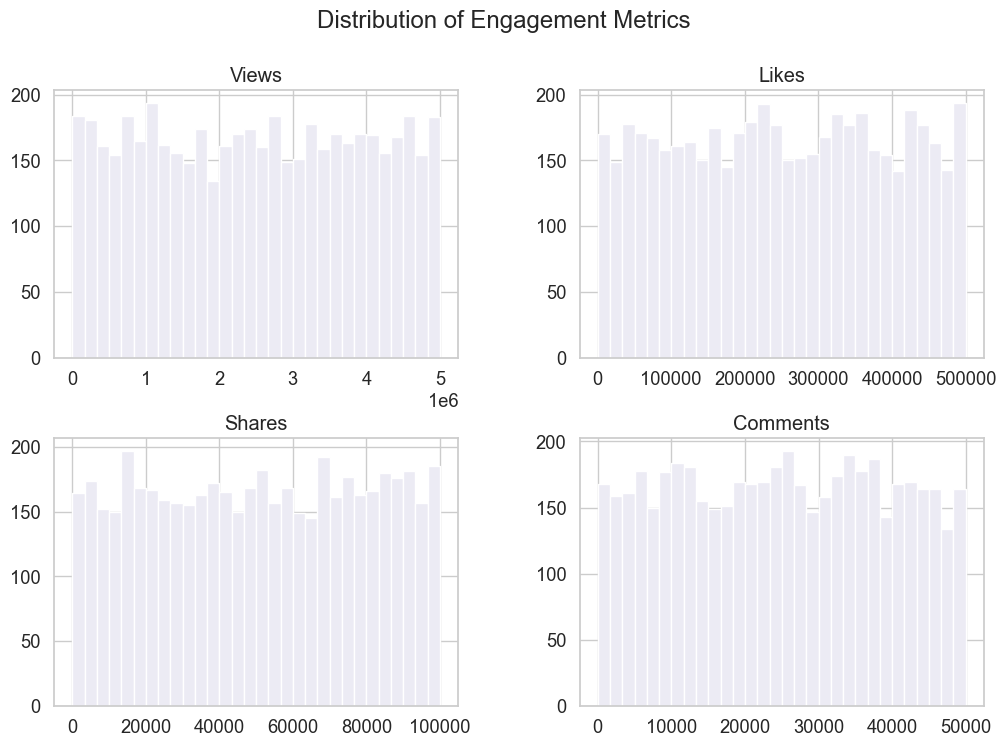

In [27]:
#In the example, the figure is set to 15 inches wide and 4 inches tall.
plt.figure(figsize =(15,4))
data[['Views','Likes','Shares','Comments']].hist(bins=30, figsize=(12,8))
plt.suptitle('Distribution of Engagement Metrics')
plt.show()

<Figure size 1500x400 with 0 Axes>

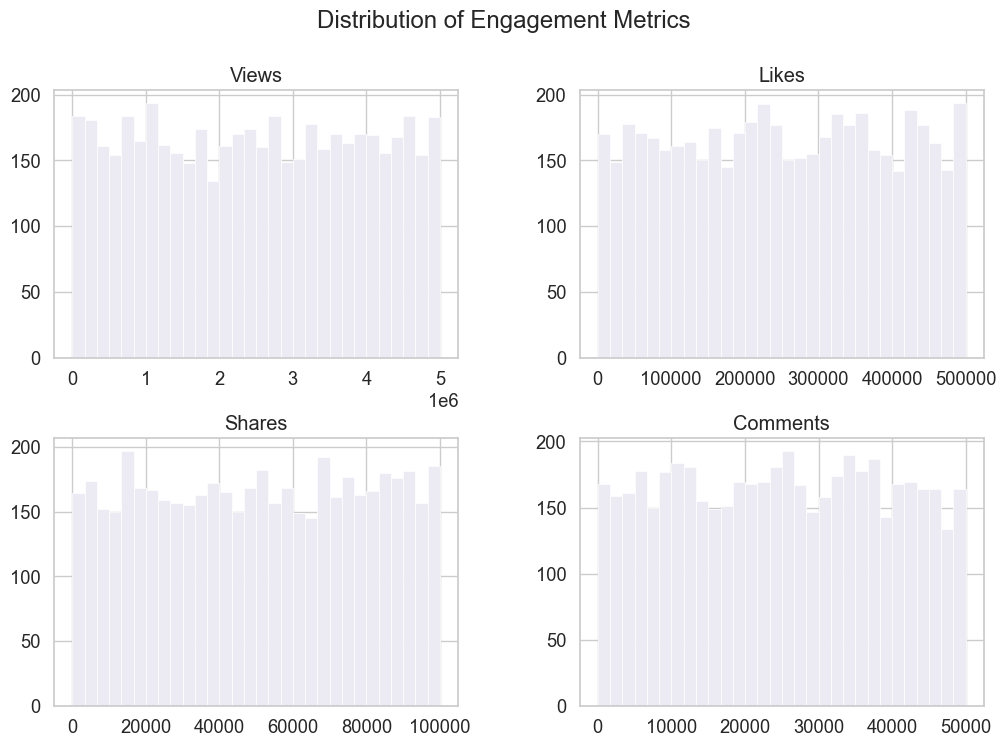

In [29]:
plt.figure(figsize =(15,4))
data[['Views','Likes','Shares','Comments']].hist(bins=30, linewidth=0.5, edgecolor="white",figsize=(12,8))
plt.suptitle('Distribution of Engagement Metrics')
plt.show()

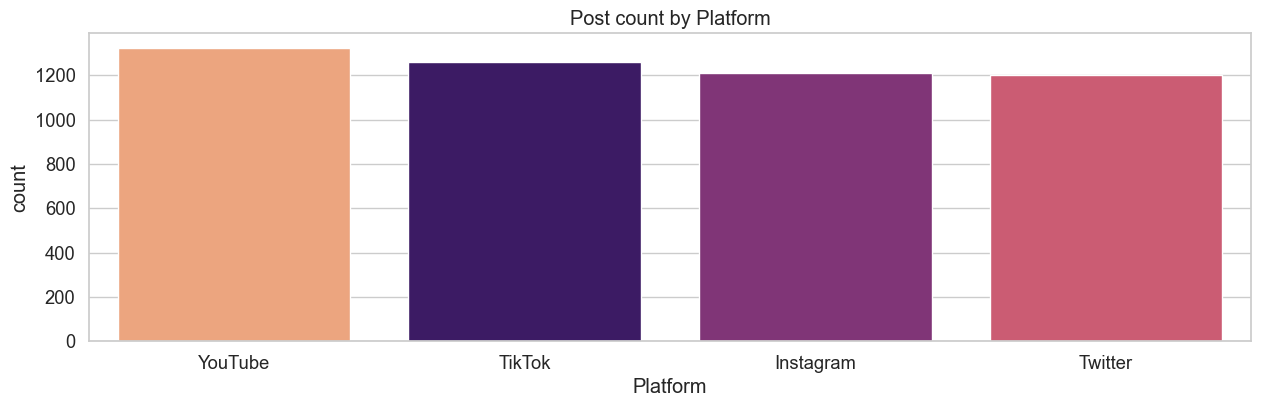

In [31]:
# Platform based analysis
plt.figure(figsize =(15,4))
sns.countplot(data=data, x='Platform', hue='Platform', palette='magma',  legend=False, order=data['Platform'].value_counts().index)
plt.title('Post count by Platform')
plt.show()

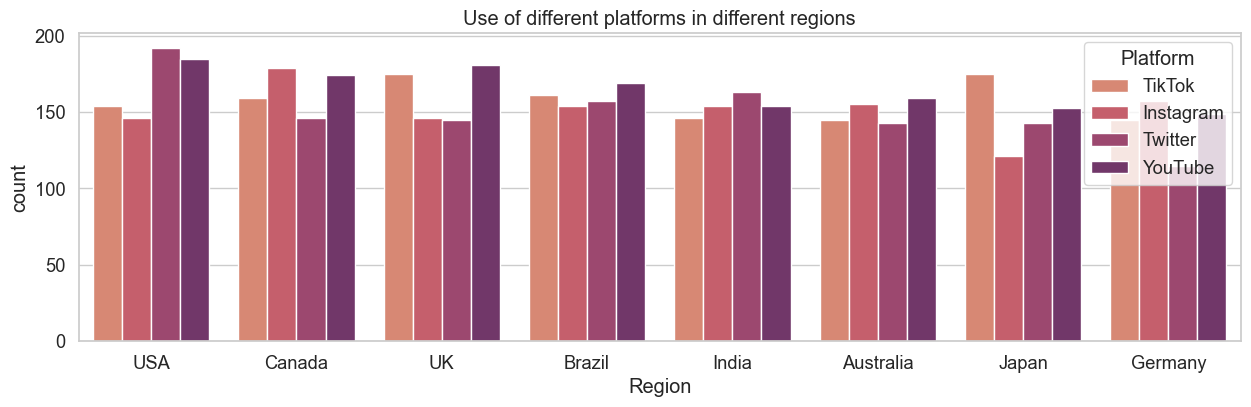

In [33]:
# Analysis by country 
plt.figure(figsize=(15, 4))
sns.countplot(data=data, x='Region', hue='Platform', palette='flare', order=data['Region'].value_counts().index) ## countplot as both discrete datasets
plt.title("Use of different platforms in different regions")
plt.show()

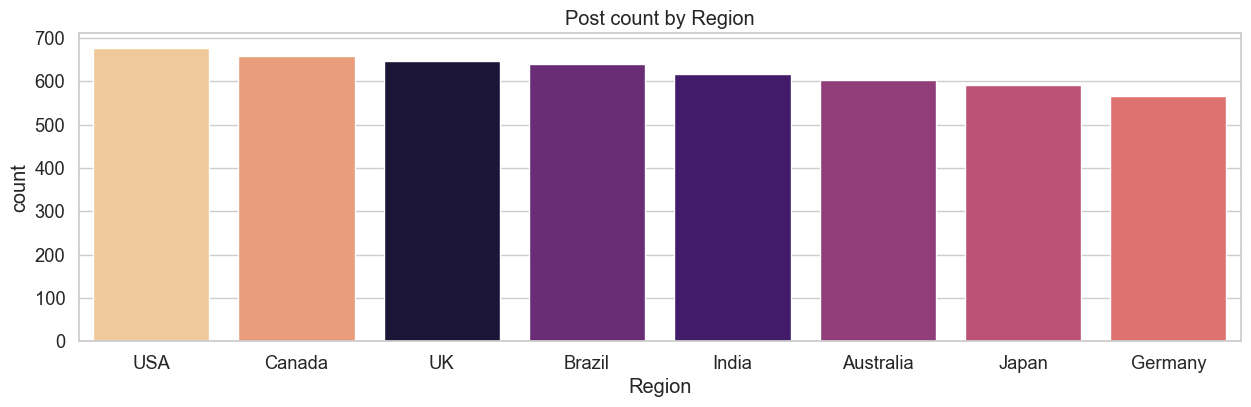

In [35]:
plt.figure(figsize=(15, 4))
sns.countplot(data=data, x='Region', hue='Region', palette='magma',  legend=False, order=data['Region'].value_counts().index)

plt.title('Post count by Region')
plt.show()

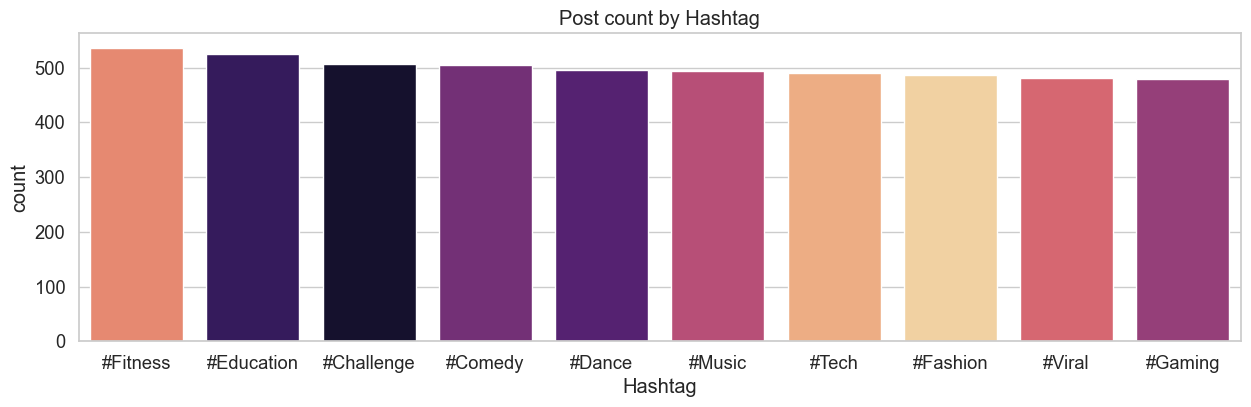

In [37]:
plt.figure(figsize =(15,4))

sns.countplot(data=data, x='Hashtag', hue='Hashtag', palette='magma',  legend=False, order=data['Hashtag'].value_counts().index)

plt.title('Post count by Hashtag')
plt.show()

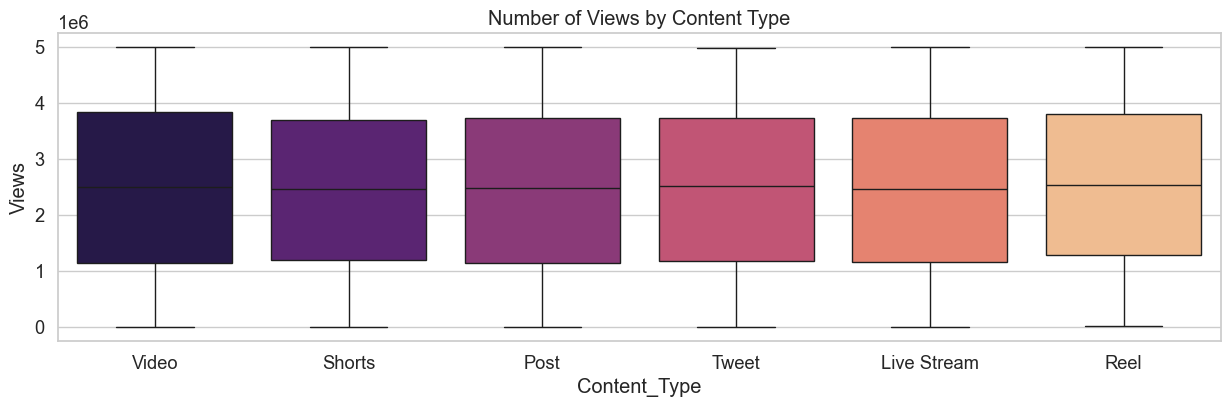

In [39]:
plt.figure(figsize =(15,4))
sns.boxplot(data=data, x='Content_Type',y='Views',hue='Content_Type', palette='magma',  legend=False)
plt.title('Number of Views by Content Type')
plt.show()

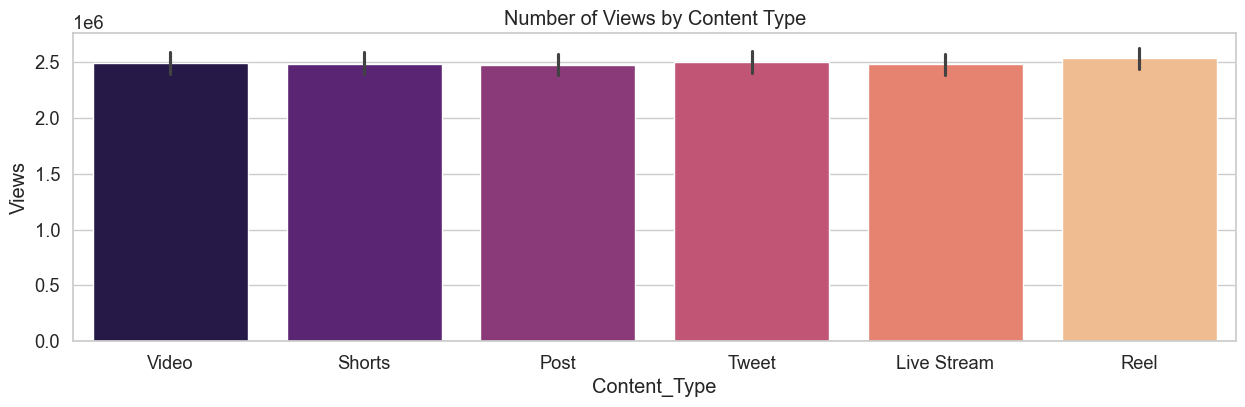

In [41]:
plt.figure(figsize =(15,4))
sns.barplot(data=data, x='Content_Type',y='Views', hue='Content_Type', palette='magma',  legend=False)
plt.title('Number of Views by Content Type')
plt.show()

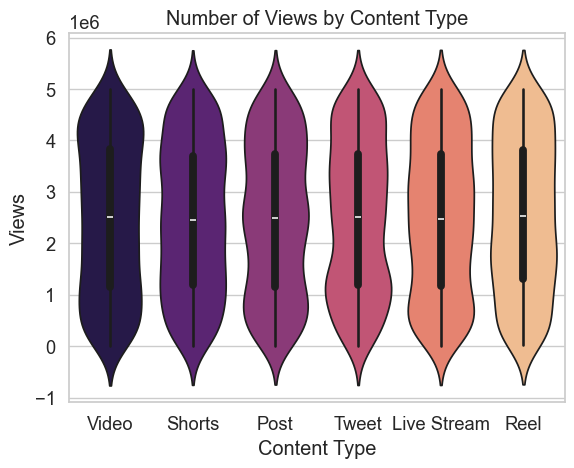

In [43]:
sns.violinplot(data=data, x='Content_Type',y='Views', hue='Content_Type', palette='magma',  legend=False)
plt.title('Number of Views by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Views')
plt.show()

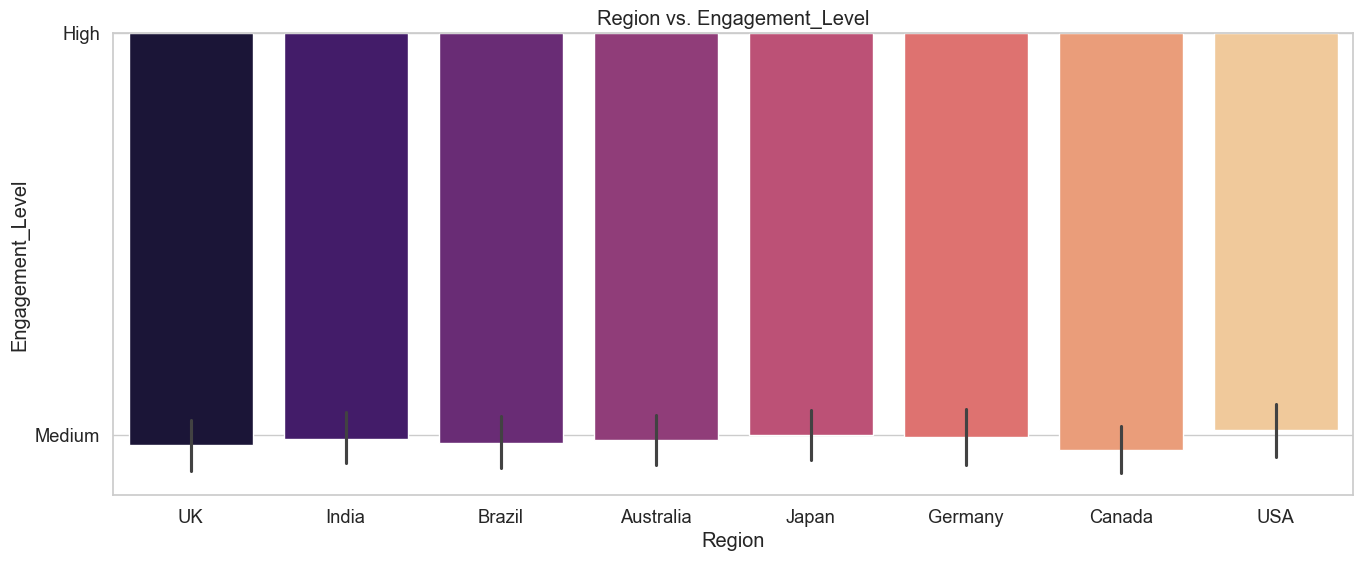

In [45]:
plt.figure(figsize =(16,6))
sns.barplot(data=data, x='Region',y='Engagement_Level',hue='Region', palette='magma',  legend=False)
plt.title('Region vs. Engagement_Level')
plt.show()

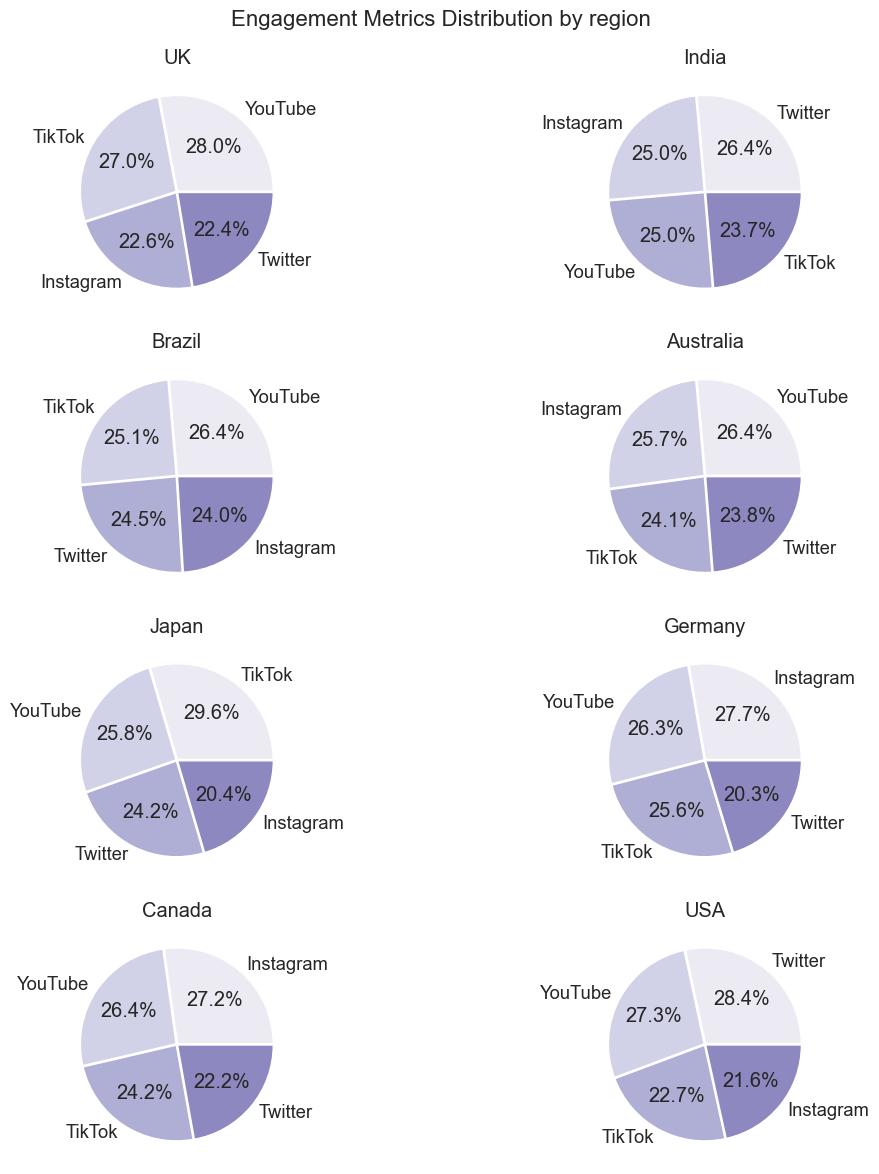

In [47]:
regions = data['Region'].unique() 

fig, axes = plt.subplots(4, 2, figsize=(12, 12))  
fig.suptitle('Engagement Metrics Distribution by region', fontsize=16)  

for i, region in enumerate(regions):
    region_data = data[data['Region'] == region]['Platform'].value_counts() 
    ax = axes[i // 2, i % 2]  
    ax.pie(x=region_data, labels=region_data.index, autopct='%1.1f%%',explode = [0.01,0.01,0.01,0.01])
    ax.set_title(region) 

plt.tight_layout() 
plt.show()

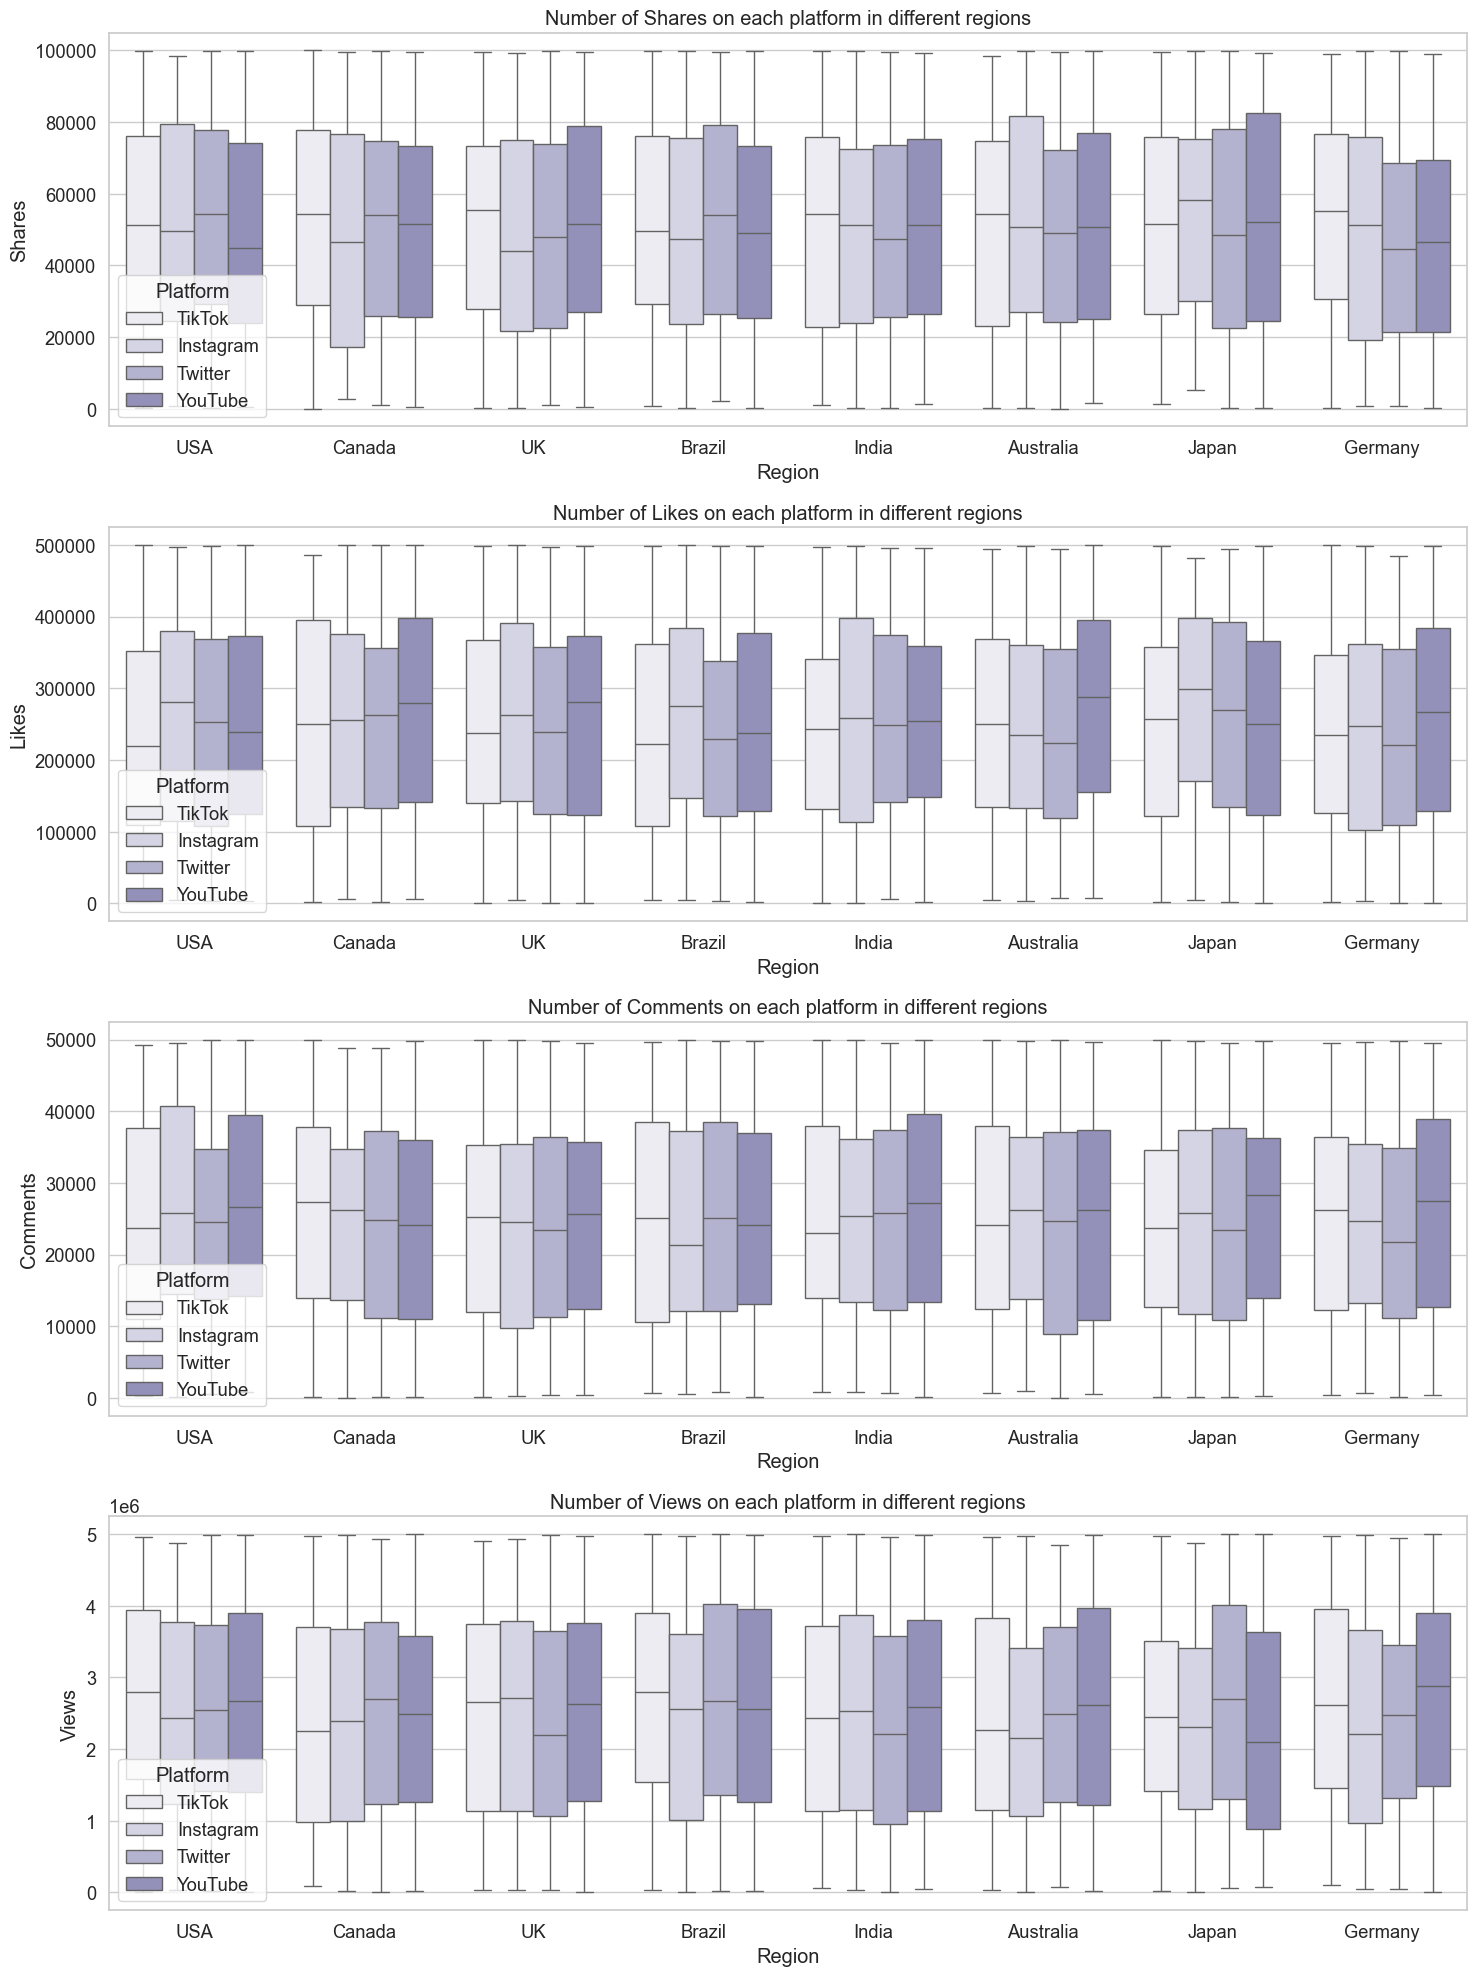

In [49]:
plt.figure(figsize=(15,20))

for i, col in enumerate(['Shares', 'Likes', 'Comments', 'Views']):
    plt.subplot(4, 1, i + 1)  # 2x2 grid, i+1 determines subplot position
    ay = sns.boxplot(data=data, x='Region', y=col, hue='Platform', order=data['Region'].value_counts().index)
    sns.move_legend(ay, 'lower left')
    plt.title(f"Number of {col} on each platform in different regions")

plt.tight_layout()  # Adjust subplot spacing
plt.show()

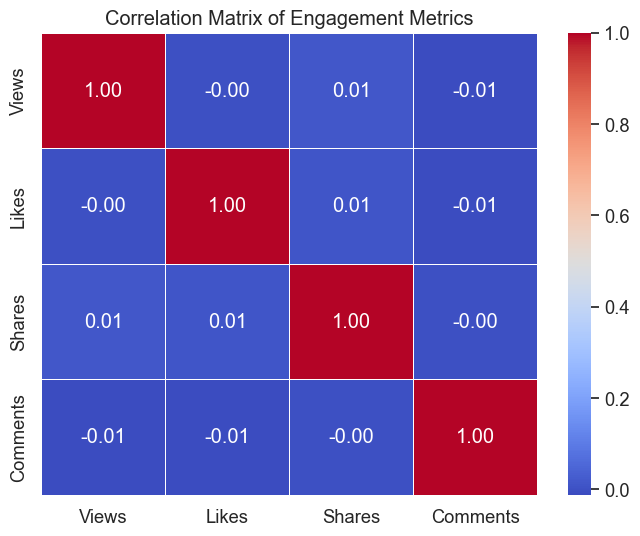

In [51]:
engagement_metrics = data[["Views", "Likes", "Shares", "Comments"]]
# Compute correlation matrix
correlation_matrix = engagement_metrics.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Engagement Metrics")
plt.show()

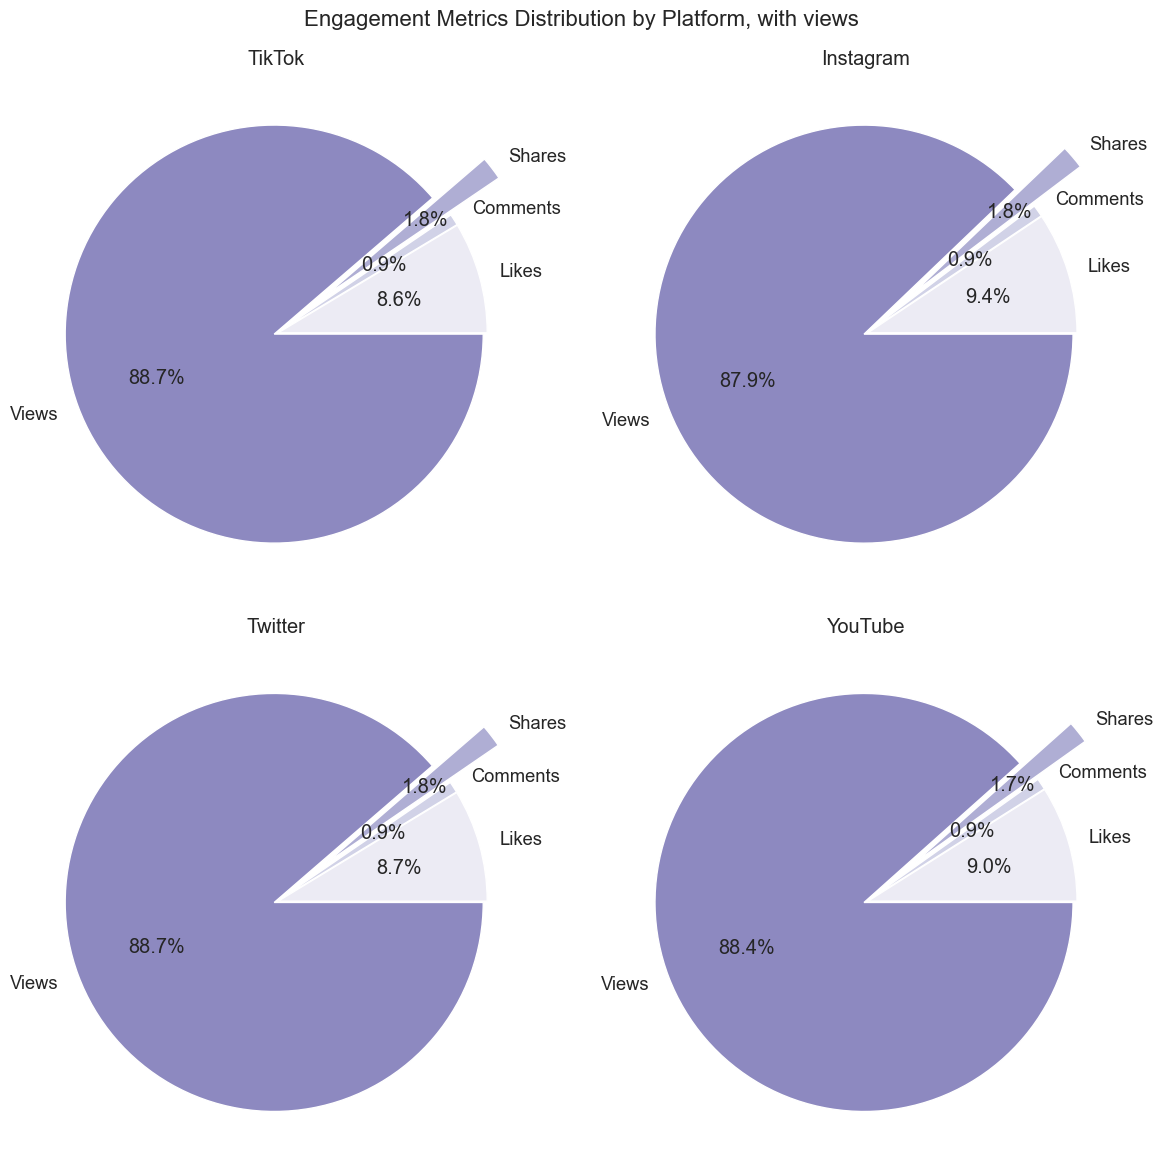

In [53]:
platforms = data['Platform'].unique()  # Get unique platform names for making individual pies

fig, axes = plt.subplots(2, 2, figsize=(12, 12))  
fig.suptitle('Engagement Metrics Distribution by Platform, with views', fontsize=16)  

for i, platform in enumerate(platforms):
    platform_data = data[data['Platform'] == platform][['Likes', 'Comments', 'Shares', 'Views']].sum()
    ax = axes[i // 2, i % 2]  # Select the appropriate subplot
    ax.pie(x=platform_data, labels=platform_data.index, autopct='%1.1f%%',explode = [0.01,0.01,0.3,0.01])
    ax.set_title(platform)  # Set subplot title

plt.tight_layout()  # Adjust spacing
plt.show()

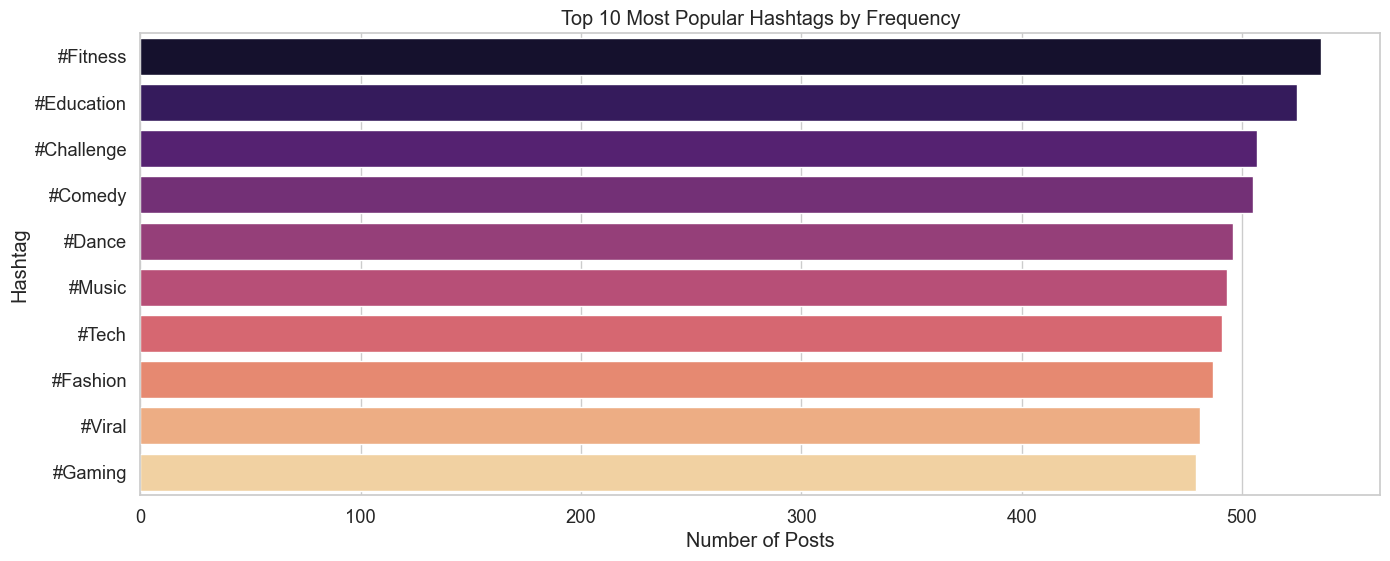

In [55]:
top_hashtags = data["Hashtag"].value_counts().nlargest(10)

plt.figure(figsize =(16,6))
sns.barplot(x=top_hashtags.values, y=top_hashtags.index, hue=top_hashtags.index, palette='magma', legend=False)
plt.title("Top 10 Most Popular Hashtags by Frequency")
plt.xlabel("Number of Posts")
plt.ylabel("Hashtag")
plt.show()

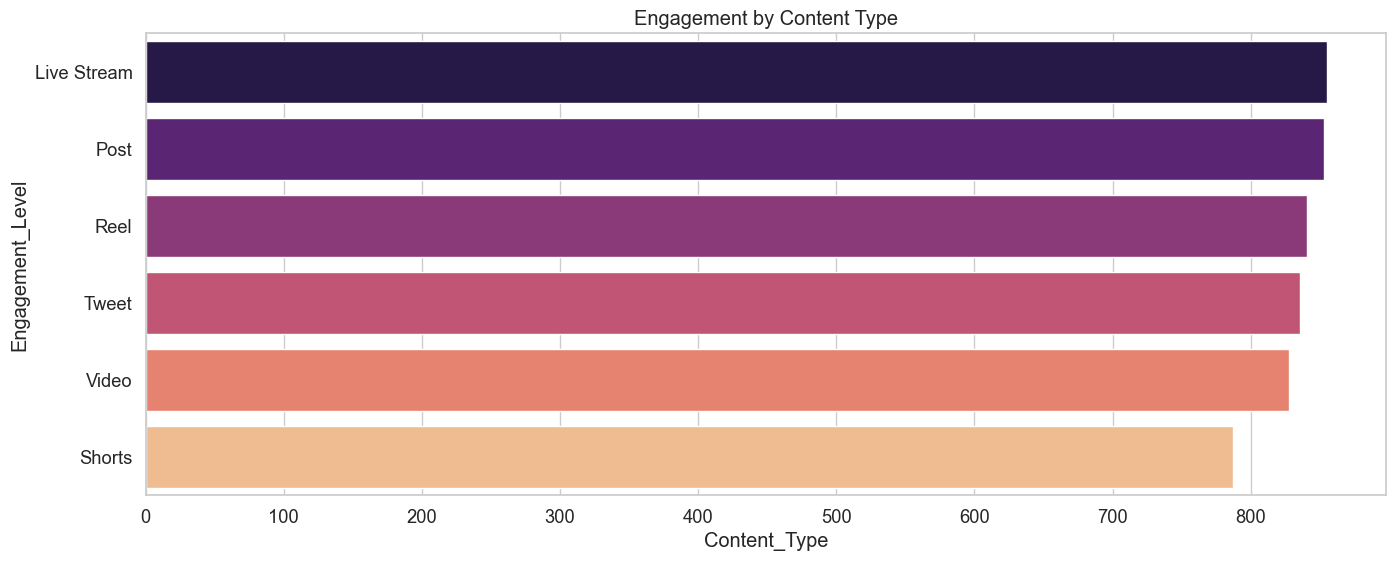

In [57]:
top_hashtags = data["Engagement_Level"].value_counts()
top_hashtags = data["Content_Type"].value_counts()

plt.figure(figsize =(16,6))
sns.barplot(x=top_hashtags.values, y=top_hashtags.index, hue=top_hashtags.index ,palette='magma',  legend=False)
plt.title("Engagement by Content Type")
plt.xlabel("Content_Type")
plt.ylabel("Engagement_Level")
plt.show()

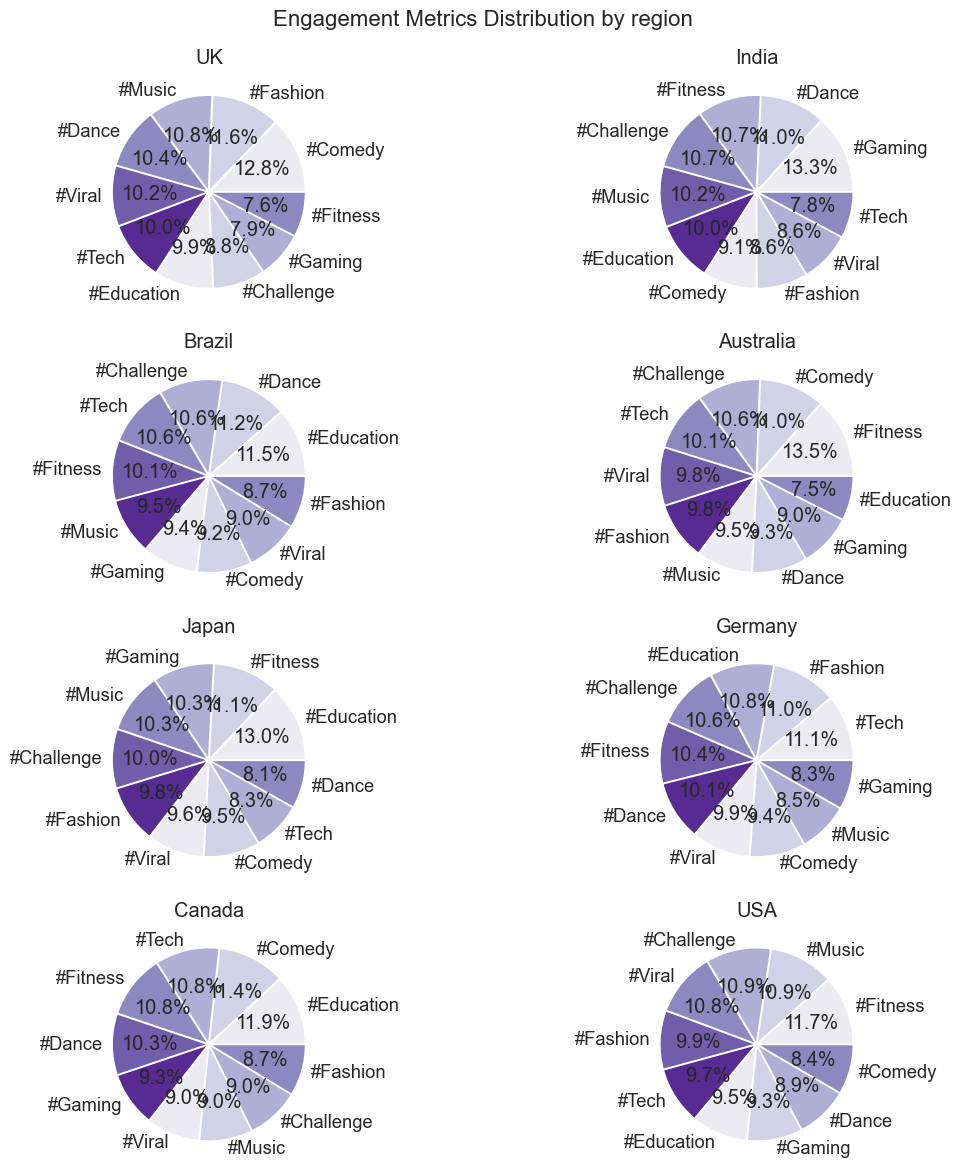

In [59]:
regions = data['Region'].unique()  

fig, axes = plt.subplots(4, 2, figsize=(12, 12)) 
fig.suptitle('Engagement Metrics Distribution by region', fontsize=16)  

for i, region in enumerate(regions):
    region_data = data[data['Region'] == region]['Hashtag'].value_counts() 
    ax = axes[i // 2, i % 2]  
    ax.pie(x=region_data, labels=region_data.index, autopct='%1.1f%%',explode = [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01])
    ax.set_title(region)  

plt.tight_layout()  
plt.show()

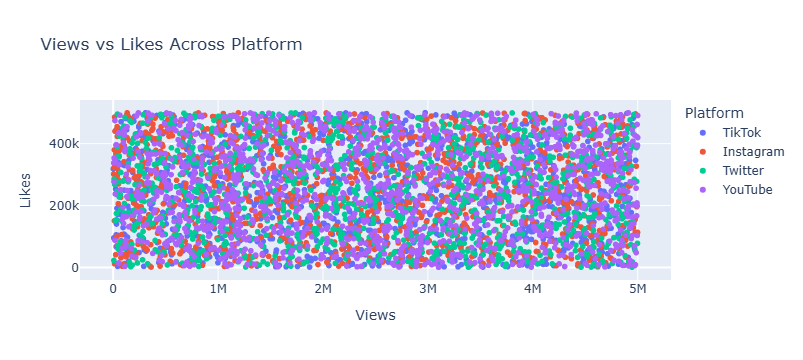

In [61]:
fig = px.scatter(data, x='Views', y='Likes', color='Platform', hover_data=['Hashtag', 'Region'], title='Views vs Likes Across Platform')
fig.show()


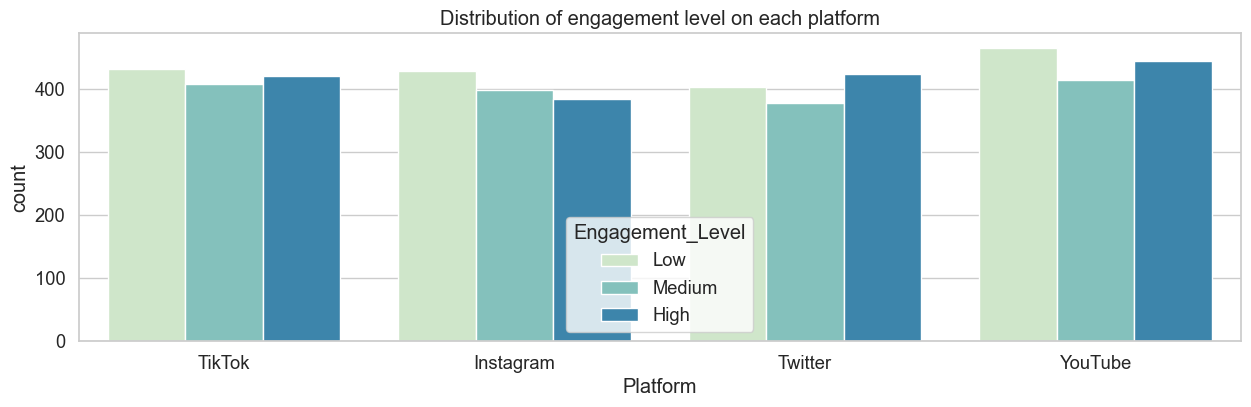

In [62]:
plt.figure(figsize=(15,4))
sns.countplot(data=data,x='Platform',hue='Engagement_Level',hue_order=['Low', 'Medium', 'High'],palette='GnBu')
plt.title("Distribution of engagement level on each platform")
plt.show()

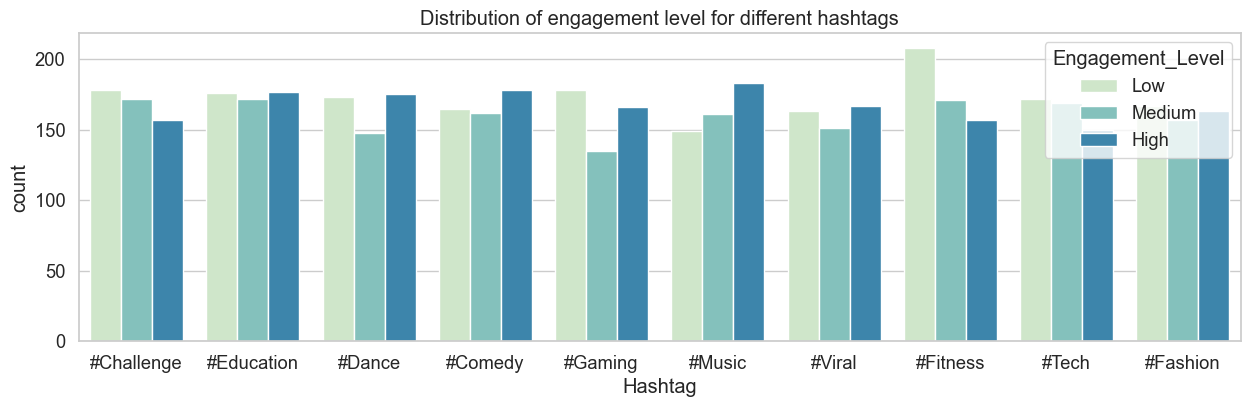

In [65]:
plt.figure(figsize=(15,4))
ab = sns.countplot(data=data,x='Hashtag',hue='Engagement_Level',hue_order=['Low', 'Medium', 'High'],palette='GnBu')
plt.title("Distribution of engagement level for different hashtags")
sns.move_legend(ab,'upper right')
plt.show()

In [25]:
#Hypothesis: 1. Null(H0): No relation 2. Alternate(H1 or Ha): Relationship present
#T-Test (less than 30): 1. One sample(with pop) 2. Two sample independent 3. Two sample dependent
#ANOVA (3 or more than 3 samples)
#Chi-Square: Categorical samples
#Significance Value (alpha): 0.01 and 0.05
# p-value: 1. > 0.05 Fail to reject null hypothesis 2. < 0.05 Accept the null hypothesis

In [27]:
# Does the platform affects the engagement?
# Ho- The engagement level are same across all the platforms.
# Ha- The engagement 

In [115]:
#Data for ANOVA Test
from sys import platform
import scipy.stats as stats
import statsmodels.api as sm
views = [data[data['Platform'] == platform]['Views'] for platform in data['Platform'].unique()]
likes = [data[data['Platform'] == platform]['Likes'] for platform in data['Platform'].unique()]
shares = [data[data['Platform'] == platform]['Shares'] for platform in data['Platform'].unique()]
comments = [data[data['Platform'] == platform]['Comments'] for platform in data['Platform'].unique()]

#tests
f_stats_views, p_views = stats.f_oneway(*views)
f_stats_likes, p_likes = stats.f_oneway(*likes)
f_stats_views, p_shares = stats.f_oneway(*shares)
f_stats_likes, p_comments = stats.f_oneway(*comments)

print(f'ANOVA RESULTS for Views p-value: {p_views}')
print(f'ANOVA RESULTS for Likes p-value: {p_likes}')
print(f'ANOVA RESULTS for Shares p-value: {p_shares}')
print(f'ANOVA RESULTS for Comments p-value: {p_comments}')

ANOVA RESULTS for Views p-value: 0.08571036406162057
ANOVA RESULTS for Likes p-value: 0.020046671209763903
ANOVA RESULTS for Shares p-value: 0.6067247961927071
ANOVA RESULTS for Comments p-value: 0.49030592124697137


In [41]:
#Views: There is a weak evidence against null hypothesis, hence we fail to reject.
#Likes: Low p-value indicate strong evidences against null hypothesis, it means we reject it.

In [45]:
# Regression Analysis
import statsmodels.formula.api as smf

print('\n Running Regression: Predict Likes on Views: ')
model = smf.ols('Likes ~ Views', data=data).fit()
print(model.summary())


 Running Regression: Predict Likes on Views: 
                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.05044
Date:                Mon, 17 Mar 2025   Prob (F-statistic):              0.822
Time:                        10:37:31   Log-Likelihood:                -66494.
No. Observations:                5000   AIC:                         1.330e+05
Df Residuals:                    4998   BIC:                         1.330e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Inter